In [76]:
import pandas as pd
import json

dfs = []

for i in range(1, 39):
    url = f"../data/people/people_{i}0.json"
    with open(url, 'r') as f:
        data = json.load(f)
        dfs.append(pd.read_json(json.dumps(data)))

df = pd.concat(dfs)

                     name birth_day  birth_month birth_year birth_time  \
0       Gouverneur Morris        30          1.0       1752      01:44   
1  Adolfh Freiherr Knigge        16         10.0       1752      05:30   
2     George Rogers Clark        19         11.0       1752       None   
3       Thomas Chatterton        20         11.0       1752      06:14   
4          Solomon Drowne        11          3.0       1753      08:00   

  mercury_sign  mercury_pos_degrees  mercury_pos_minutes mercury_house  \
0     Aquarius                  2.0                 51.0             3   
1        Libra                  6.0                 11.0            12   
2  Sagittarius                  1.0                 30.0                 
3  Sagittarius                  2.0                 21.0             1   
4       Pisces                 12.0                 55.0            11   

   mercury_retrograde  ... death_month  death_year    occupation gender  \
0                 1.0  ...         

In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
from proc_utils import preprocess_data

In [92]:
df = preprocess_data(df)
df.shape

(20359, 95)

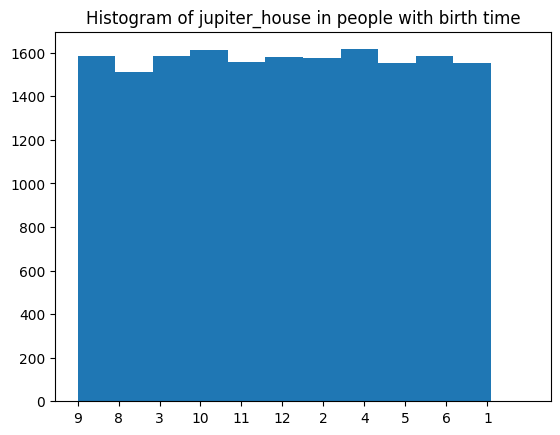

In [64]:
import matplotlib.pyplot as plt

def plot_histogram(df, series_id):
    plt.title(f'Histogram of {series_id} in people with birth time')

    s_str = df[series_id].astype(str)
    plt.hist(s_str, bins=12, range=(1, 12))
    plt.show()

plot_histogram(df_ac, "jupiter_house")

array(['1816', '1796', '1770', '1834', '1821', '1823', '1838', '1793',
       '1817', '1794', '1832', '1843', '1776', '1791', '1836', '1840',
       '1828', '1822', '1827', '1808', '1831', '1835', '1805', '1814',
       '1797', '1820', '1806', '1842', '1819', '1812', '1847', '1825',
       '1848', '1841', '1845', '1815', '1852', '1850', '1849', '1851',
       '1837', '1801', '1844', '1859', '1853', '1854', '1864', '1804',
       '1855', '1810', '1811', '1867', '1858', '1829', '1826', '1830',
       '1868', '1818', '1862', '1857', '1795', '1846', '1865', '1863',
       '1873', '1866', '1871', '1861', '1889', '1824', '1860', '1872',
       '1813', '1878', '1880', '1874', '1886', '1881', '1875', '1877',
       '1869', '1856', '1876', '1888', '1890', '1883', '1884', '1887',
       '1870', '1885', '1879', '1882', '1899', '1893', '1894', '1903',
       '1891', '1892', '1897', '1898', '1839', '1896', '1910', '1901',
       '1900', '1908', '1895', '1902', '1906', '1904', '1911', '1916',
      

In [11]:
count = df['birth_time'].isna().sum()
print('Number of NaN values in "birth time" column:', count)

Number of NaN values in "birth time" column: 20513


In [12]:
len(df)

33892

In [13]:
df["occupation"].unique()

array(['politician', 'writer', 'general', ...,
       'programmer, inventor of the use of @ symbol in e-mail',
       'drummer, singer, artist', 'musician, singer, actor, artist'],
      dtype=object)

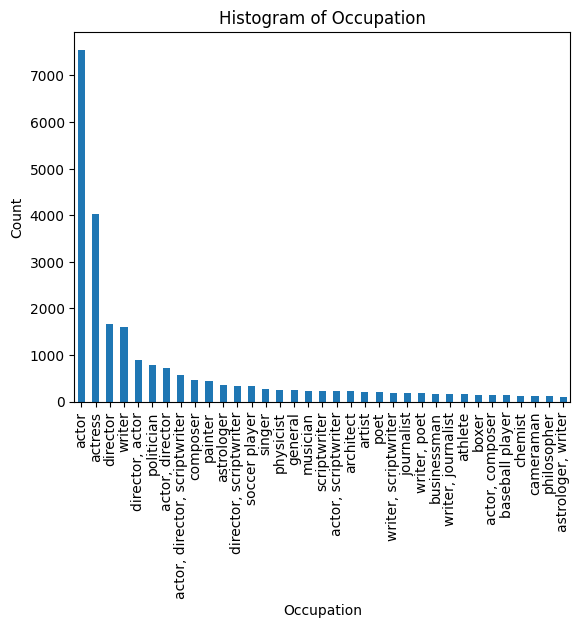

In [15]:
counts = df['occupation'].value_counts()

# Filter the results to exclude occupations with less than 10 counts
counts = counts[counts >= 100]

# Create a bar chart of the remaining occupations
counts.plot(kind='bar')

# Set axis labels and title
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Histogram of Occupation')

# Show the plot
plt.show()

In [57]:
df["death_cause"].unique()

array([None, 'Stroke', 'Suicide by Poisoning', 'Execution by Beheading',
       'Execution by Hanging', 'Murder', 'Disease', 'War Casualties',
       'Tuberculosis', 'Injury', 'Heart Attack',
       'Victims of Assassination', 'Pneumonia', 'Syphilis',
       'Execution by Gunshot', 'Cancer', 'Unclear cause',
       'Murder by Gunshot', 'Heart Failure', 'Suicide',
       'Suicide by Gunshot', 'Cirrhosis', 'Fever', 'Drowning',
       'Multiple Sclerosis', 'Accident', 'Suicide by Hanging',
       'Train Accident', 'Liver Failure', 'Kidney Failure',
       "Alzheimer's Disease", 'Respiratory/Lung Failure', 'Brain Failure',
       'Diabetes', 'Influenza', 'Aneurysm', 'Alcohol', 'Car Accident',
       'Asthma', 'Casualties of World War I', 'Leukemia', 'Execution',
       'Execution by Electric Chair', 'Aviation Accident',
       'Drug Overdose', 'Pill Overdose', "Parkinson's disease",
       'Stomach Failure', 'AIDS', 'Terrorism',
       'casualties of World War II', nan, 'Fall',
       'Exe

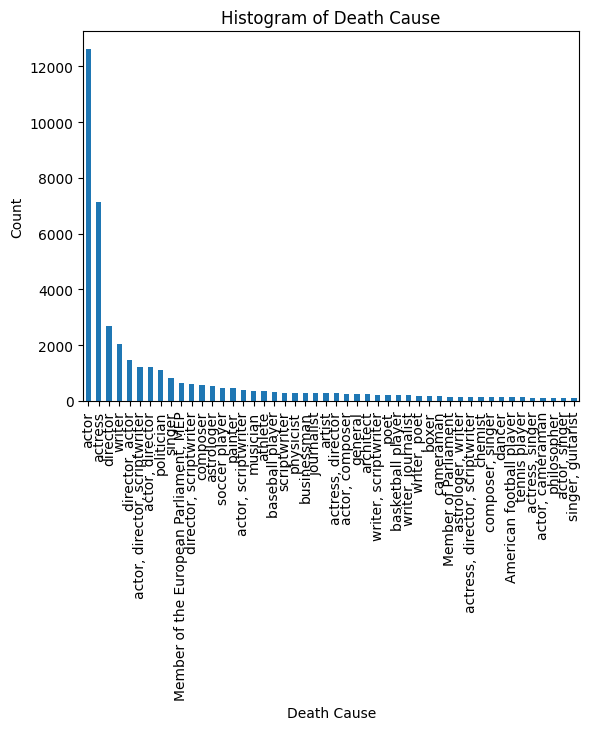

(46909, 95)

In [63]:
# Drop rows where 'death_cause' is NaN
df2 = df.dropna(subset=["occupation"])

# Count the occurrences of each cause of death
counts = df2["occupation"].value_counts()

counts = counts[counts >= 100]
# Create a bar chart of the causes of death
counts.plot(kind='bar')

# Set axis labels and title
plt.xlabel('Death Cause')
plt.ylabel('Count')
plt.title('Histogram of Death Cause')

# Show the plot
plt.show()
df2.shape

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

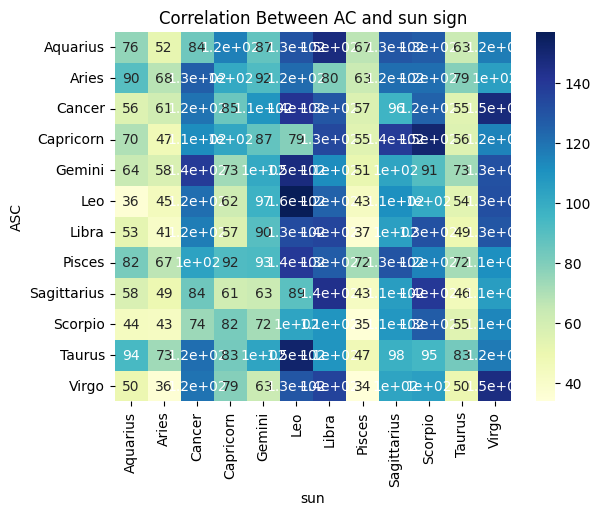

In [24]:
# Filter the DataFrame to include only occupations with more than 10 occurrences
counts = df['death_cause'].value_counts()
counts = counts[counts > 20]
df2 = df[df['death_cause'].isin(counts.index)]
df.dropna(subset=['house_AC_sign'], inplace=True)
df.shape
# Create a contingency table of 'sun_sign' and 'occupation'
table = pd.crosstab(df['sun_sign'], df["house_AC_sign"])

# Create a heatmap of the correlation
sns.heatmap(table, annot=True, cmap='YlGnBu')

# Set axis labels and title
plt.xlabel('sun')
plt.ylabel("ASC")
plt.title('Correlation Between AC and sun sign')

# Show the plot
plt.show()

In [27]:
df.shape

(13384, 95)

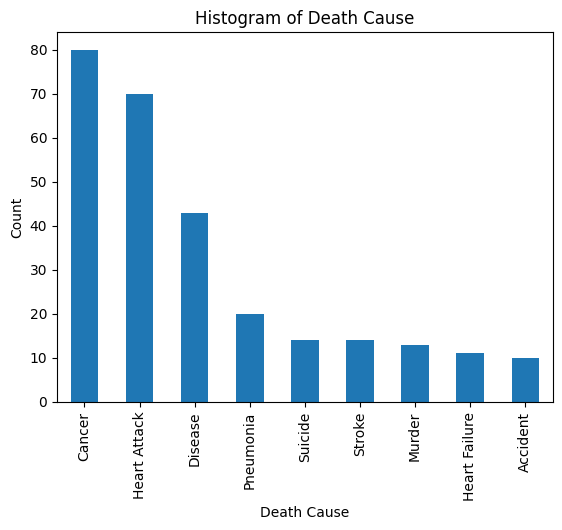

(1403, 95)


In [47]:


df.columns
mask = df['pluto_house'] == 12

subset = df[df['pluto_house'] == '12']
subset

counts = subset["death_cause"].value_counts()

counts = counts[counts >= 10]
# Create a bar chart of the causes of death
counts.plot(kind='bar')

# Set axis labels and title
plt.xlabel('Death Cause')
plt.ylabel('Count')
plt.title('Histogram of Death Cause')

# Show the plot
plt.show()
subset.shape
print(subset.shape)